In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams['figure.dpi']=300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [4]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Axes: >

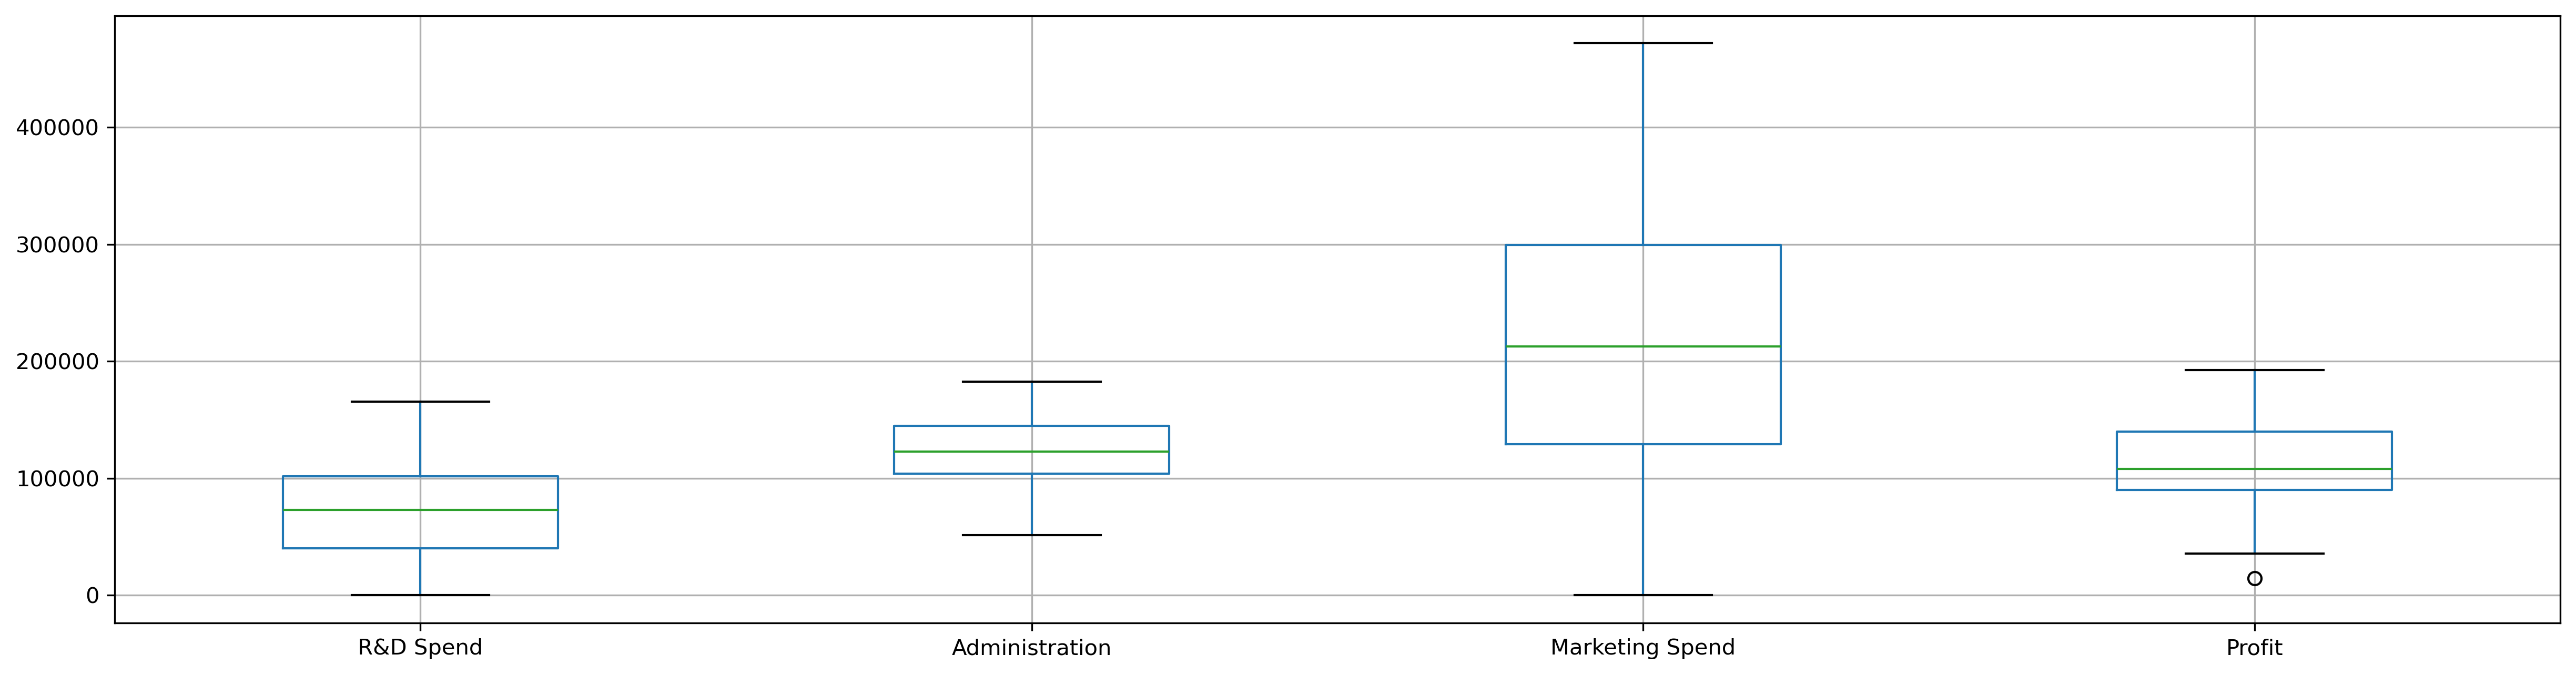

In [6]:
df.boxplot()

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
def outlier_detection(data,colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    IQR =q3 - q1 
    
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    
    return upper, lower

In [9]:
outlier_detection(df, 'Profit')

(214206.58999999997, 15698.290000000023)

In [10]:
df.loc[df['Profit'] < 214206.58 ,'Profit'] = 214206.58

<Axes: >

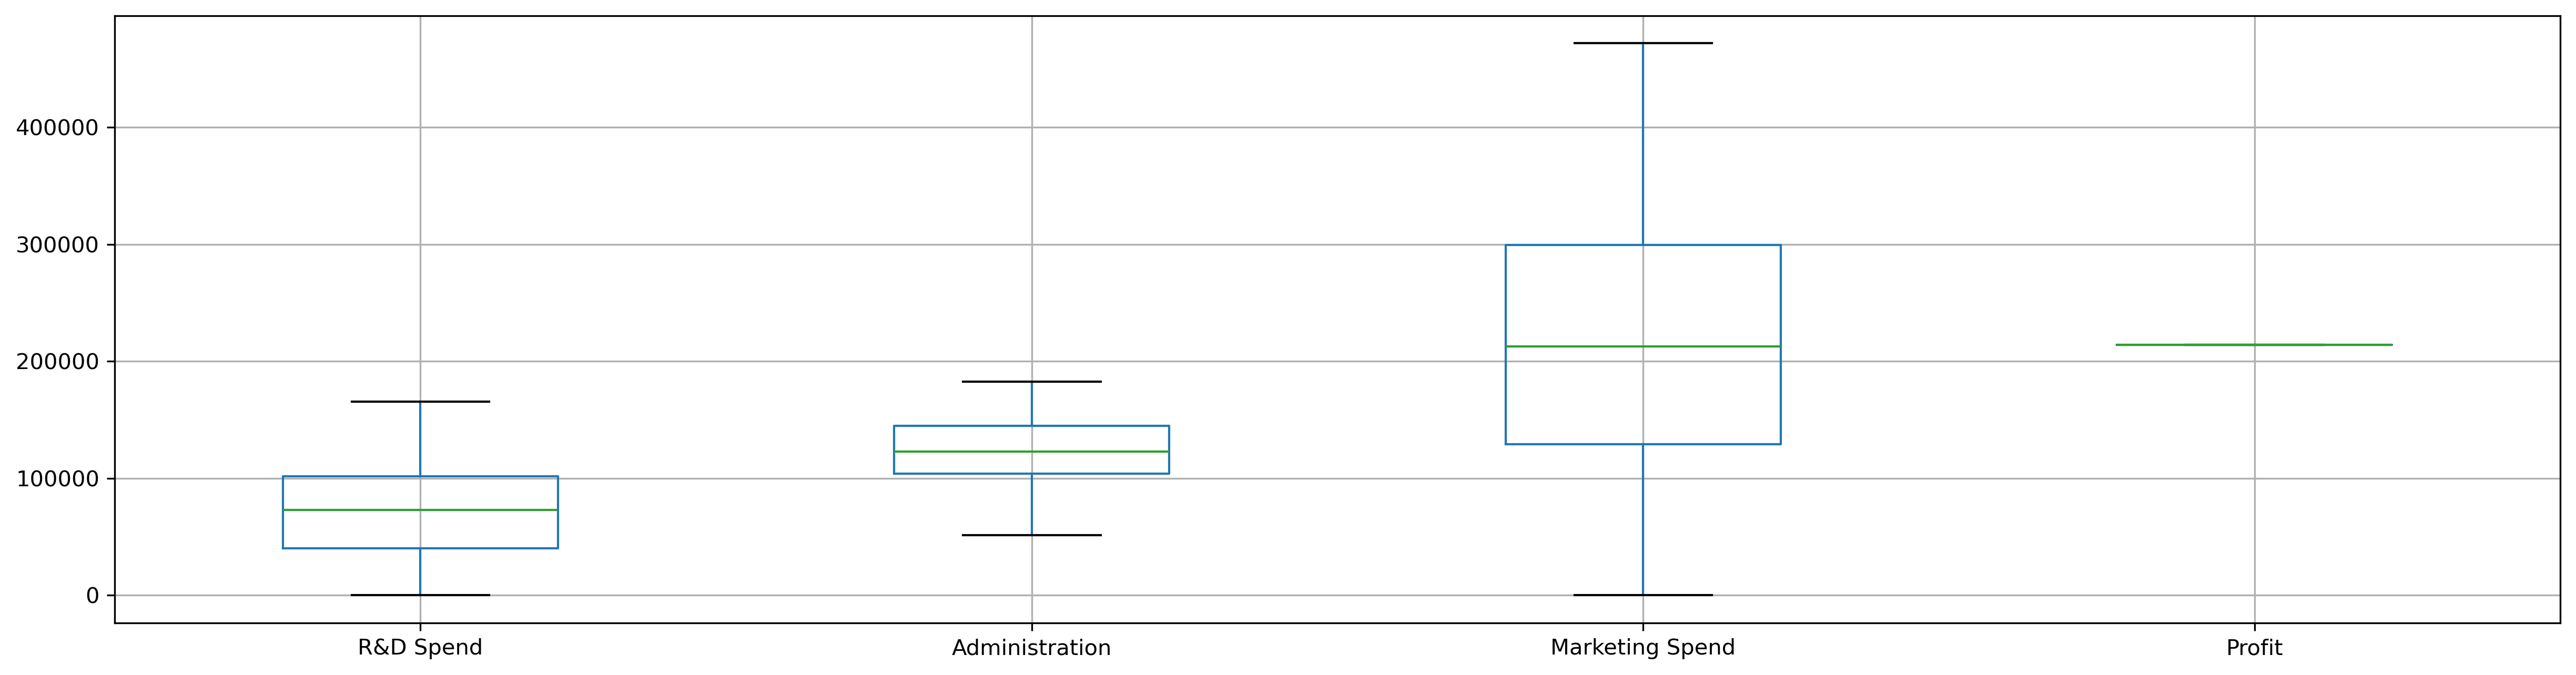

In [11]:
df.boxplot()

In [ ]:
# df.corr()

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X

R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New York
16   78013.11       121597.55        264346.06  California
17   94657.16       145077.58        282574.31    New York
18   91749.16       114175.79        294919.57     Florida
19   86419.70       153514.11             0.00    New York
20   76253.86       113867.30        298664.47  California
21   78389.47       153773.43        299737.29    New York
22   73994.56       122782.75        303319.26     Florida
23   67532.53       105751.03        304768.73     Florida
24   77044.01        99281.34        140574.81    New York
25   64664.71       139553.16        137962.62  California
26   75328.87       144135.98        134050.07     Florida
27   72107.60       127864.55        353183.81    New York
28   66051.52       182645.56        118148.20     Florida
29   65605.48       153032.06        107138.38    New York
30   61994.48       115641.28         91131.24     Florida
31   61136.38       152701.92         88218.23    New York
32   63408.86       129219.61         46085.25  California
33   55493.95       103057.49        214634.81     Florida
34   46426.07       157693.92        210797.67  California
35   46014.02        85047.44        205517.64    New York
36   28663.76       127056.21        201126.82     Florida
37   44069.95        51283.14        197029.42  California
38   20229.59        65947.93        185265.10    New York
39   38558.51        82982.09        174999.30  California
40   28754.33       118546.05        172795.67  California
41   27892.92        84710.77        164470.71     Florida
42   23640.93        96189.63        148001.11  California
43   15505.73       127382.30         35534.17    New York
44   22177.74       154806.14         28334.72  California
45    1000.23       124153.04          1903.93    New York
46    1315.46       115816.21        297114.46     Florida
47       0.00       135426.92             0.00  California
48     542.05        51743.15             0.00    New York
49       0.00       116983.80         45173.06  California

In [14]:
y

0     214206.58
1     214206.58
2     214206.58
3     214206.58
4     214206.58
5     214206.58
6     214206.58
7     214206.58
8     214206.58
9     214206.58
10    214206.58
11    214206.58
12    214206.58
13    214206.58
14    214206.58
15    214206.58
16    214206.58
17    214206.58
18    214206.58
19    214206.58
20    214206.58
21    214206.58
22    214206.58
23    214206.58
24    214206.58
25    214206.58
26    214206.58
27    214206.58
28    214206.58
29    214206.58
30    214206.58
31    214206.58
32    214206.58
33    214206.58
34    214206.58
35    214206.58
36    214206.58
37    214206.58
38    214206.58
39    214206.58
40    214206.58
41    214206.58
42    214206.58
43    214206.58
44    214206.58
45    214206.58
46    214206.58
47    214206.58
48    214206.58
49    214206.58
Name: Profit, dtype: float64

In [15]:
States = pd.get_dummies(X['State'],drop_first=True)

In [16]:
X = X.drop('State',axis=1)

In [17]:
X = pd.concat([X,States], axis=1)

In [18]:
X

R&D Spend  Administration  Marketing Spend  Florida  New York
0   165349.20       136897.80        471784.10    False      True
1   162597.70       151377.59        443898.53    False     False
2   153441.51       101145.55        407934.54     True     False
3   144372.41       118671.85        383199.62    False      True
4   142107.34        91391.77        366168.42     True     False
5   131876.90        99814.71        362861.36    False      True
6   134615.46       147198.87        127716.82    False     False
7   130298.13       145530.06        323876.68     True     False
8   120542.52       148718.95        311613.29    False      True
9   123334.88       108679.17        304981.62    False     False
10  101913.08       110594.11        229160.95     True     False
11  100671.96        91790.61        249744.55    False     False
12   93863.75       127320.38        249839.44     True     False
13   91992.39       135495.07        252664.93    False     False
14  119943.24       156547.42        256512.92     True     False
15  114523.61       122616.84        261776.23    False      True
16   78013.11       121597.55        264346.06    False     False
17   94657.16       145077.58        282574.31    False      True
18   91749.16       114175.79        294919.57     True     False
19   86419.70       153514.11             0.00    False      True
20   76253.86       113867.30        298664.47    False     False
21   78389.47       153773.43        299737.29    False      True
22   73994.56       122782.75        303319.26     True     False
23   67532.53       105751.03        304768.73     True     False
24   77044.01        99281.34        140574.81    False      True
25   64664.71       139553.16        137962.62    False     False
26   75328.87       144135.98        134050.07     True     False
27   72107.60       127864.55        353183.81    False      True
28   66051.52       182645.56        118148.20     True     False
29   65605.48       153032.06        107138.38    False      True
30   61994.48       115641.28         91131.24     True     False
31   61136.38       152701.92         88218.23    False      True
32   63408.86       129219.61         46085.25    False     False
33   55493.95       103057.49        214634.81     True     False
34   46426.07       157693.92        210797.67    False     False
35   46014.02        85047.44        205517.64    False      True
36   28663.76       127056.21        201126.82     True     False
37   44069.95        51283.14        197029.42    False     False
38   20229.59        65947.93        185265.10    False      True
39   38558.51        82982.09        174999.30    False     False
40   28754.33       118546.05        172795.67    False     False
41   27892.92        84710.77        164470.71     True     False
42   23640.93        96189.63        148001.11    False     False
43   15505.73       127382.30         35534.17    False      True
44   22177.74       154806.14         28334.72    False     False
45    1000.23       124153.04          1903.93    False      True
46    1315.46       115816.21        297114.46     True     False
47       0.00       135426.92             0.00    False     False
48     542.05        51743.15             0.00    False      True
49       0.00       116983.80         45173.06    False     False

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X = sc.fit_transform(X)

In [22]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -6.85994341e-01

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

In [ ]:
# lr.fit(X_train,y_train)

In [ ]:
# lr.coef_

In [ ]:
# lr.intercept_

In [ ]:
# y_pred = lr.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score
# score = r2_score(y_test,y_pred)

In [ ]:
# print(score)

In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# # mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(mse)
# print(mae)
# print(rmse)

In [23]:
X = sm.add_constant(X) 

In [24]:
model = sm.OLS(y, X).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -8.800
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               1.00
Time:                        15:32:22   Log-Likelihood:                 1123.5
No. Observations:                  50   AIC:                            -2235.
Df Residuals:                      44   BIC:                            -2224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.142e+05   6.36e-12   3.37e+16      0.0

In [28]:
model.rsquared

-inf

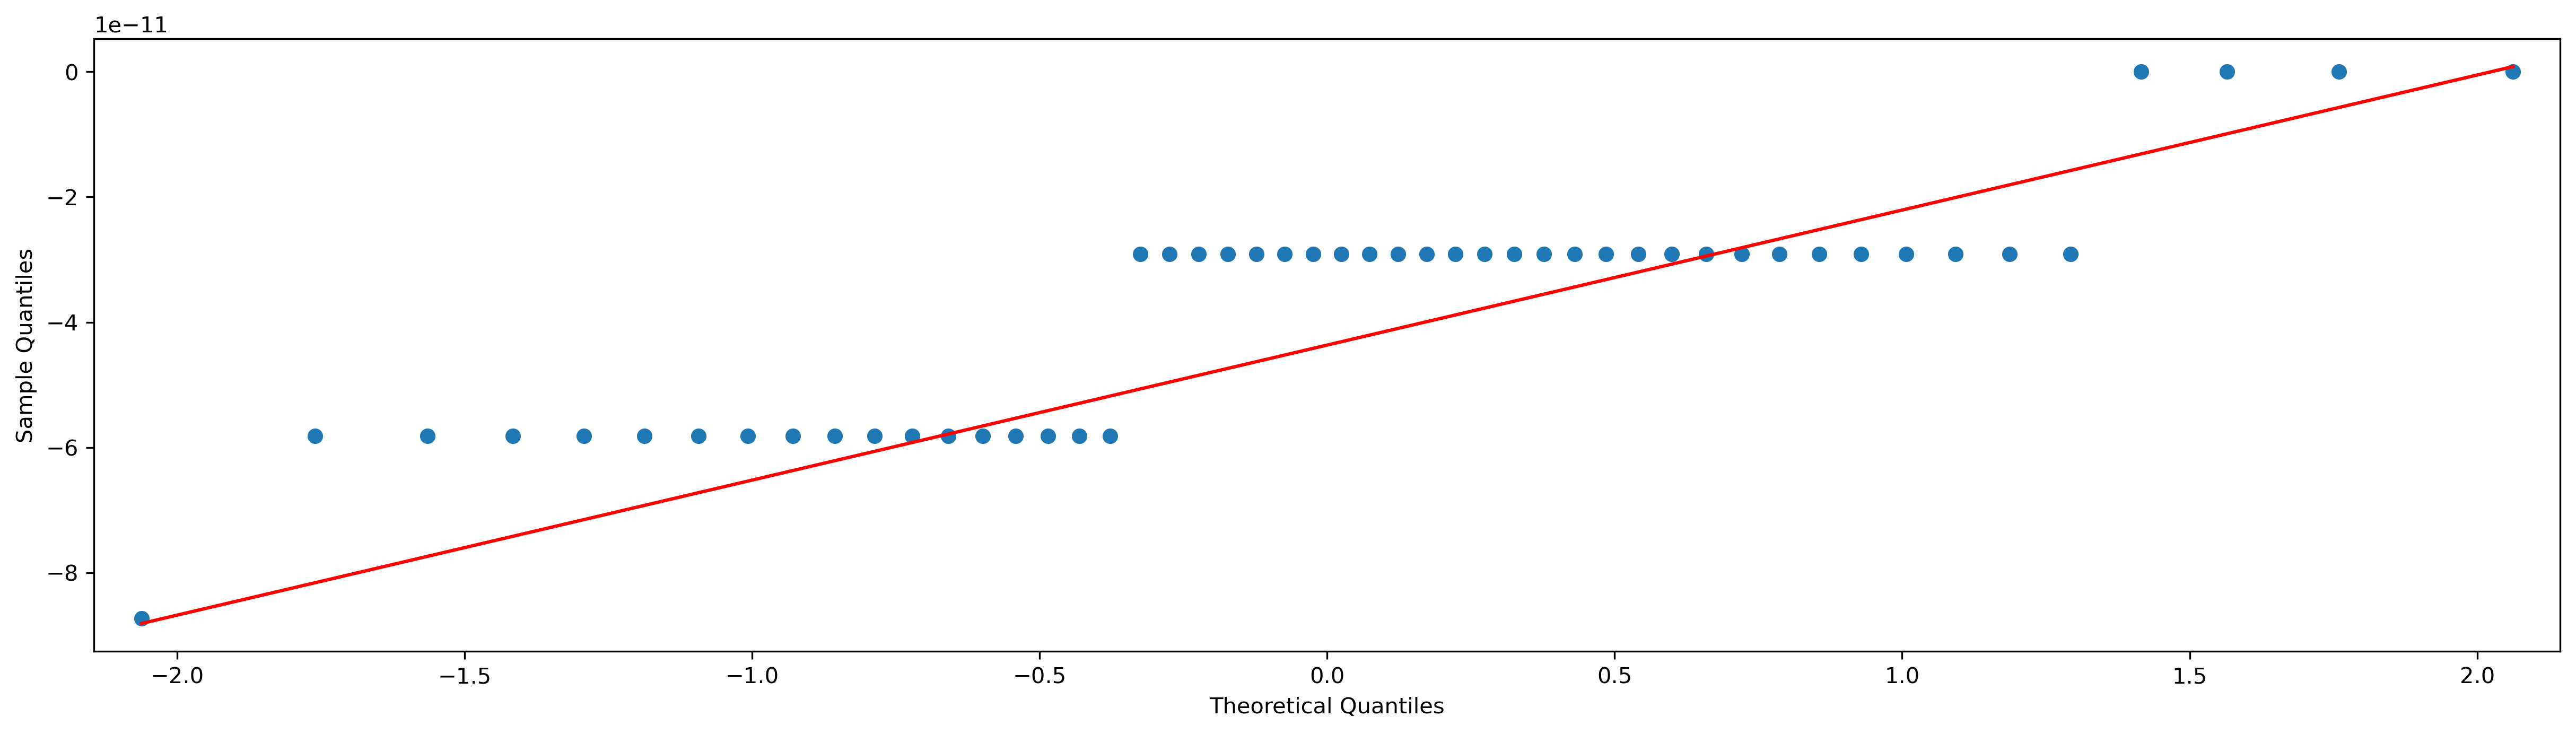

In [29]:
sm.qqplot(model.resid, line = 'q');

In [30]:
np.argmax(model.resid), np.max(model.resid)

(37, 0.0)

In [31]:
model.params

const    2.142066e+05
x1       9.094947e-12
x2       7.275958e-12
x3      -1.818989e-12
x4       3.637979e-12
x5       1.455192e-11
dtype: float64

In [32]:
model.fittedvalues

0     214206.58
1     214206.58
2     214206.58
3     214206.58
4     214206.58
5     214206.58
6     214206.58
7     214206.58
8     214206.58
9     214206.58
10    214206.58
11    214206.58
12    214206.58
13    214206.58
14    214206.58
15    214206.58
16    214206.58
17    214206.58
18    214206.58
19    214206.58
20    214206.58
21    214206.58
22    214206.58
23    214206.58
24    214206.58
25    214206.58
26    214206.58
27    214206.58
28    214206.58
29    214206.58
30    214206.58
31    214206.58
32    214206.58
33    214206.58
34    214206.58
35    214206.58
36    214206.58
37    214206.58
38    214206.58
39    214206.58
40    214206.58
41    214206.58
42    214206.58
43    214206.58
44    214206.58
45    214206.58
46    214206.58
47    214206.58
48    214206.58
49    214206.58
dtype: float64

Text(0, 0.5, 'Errors')

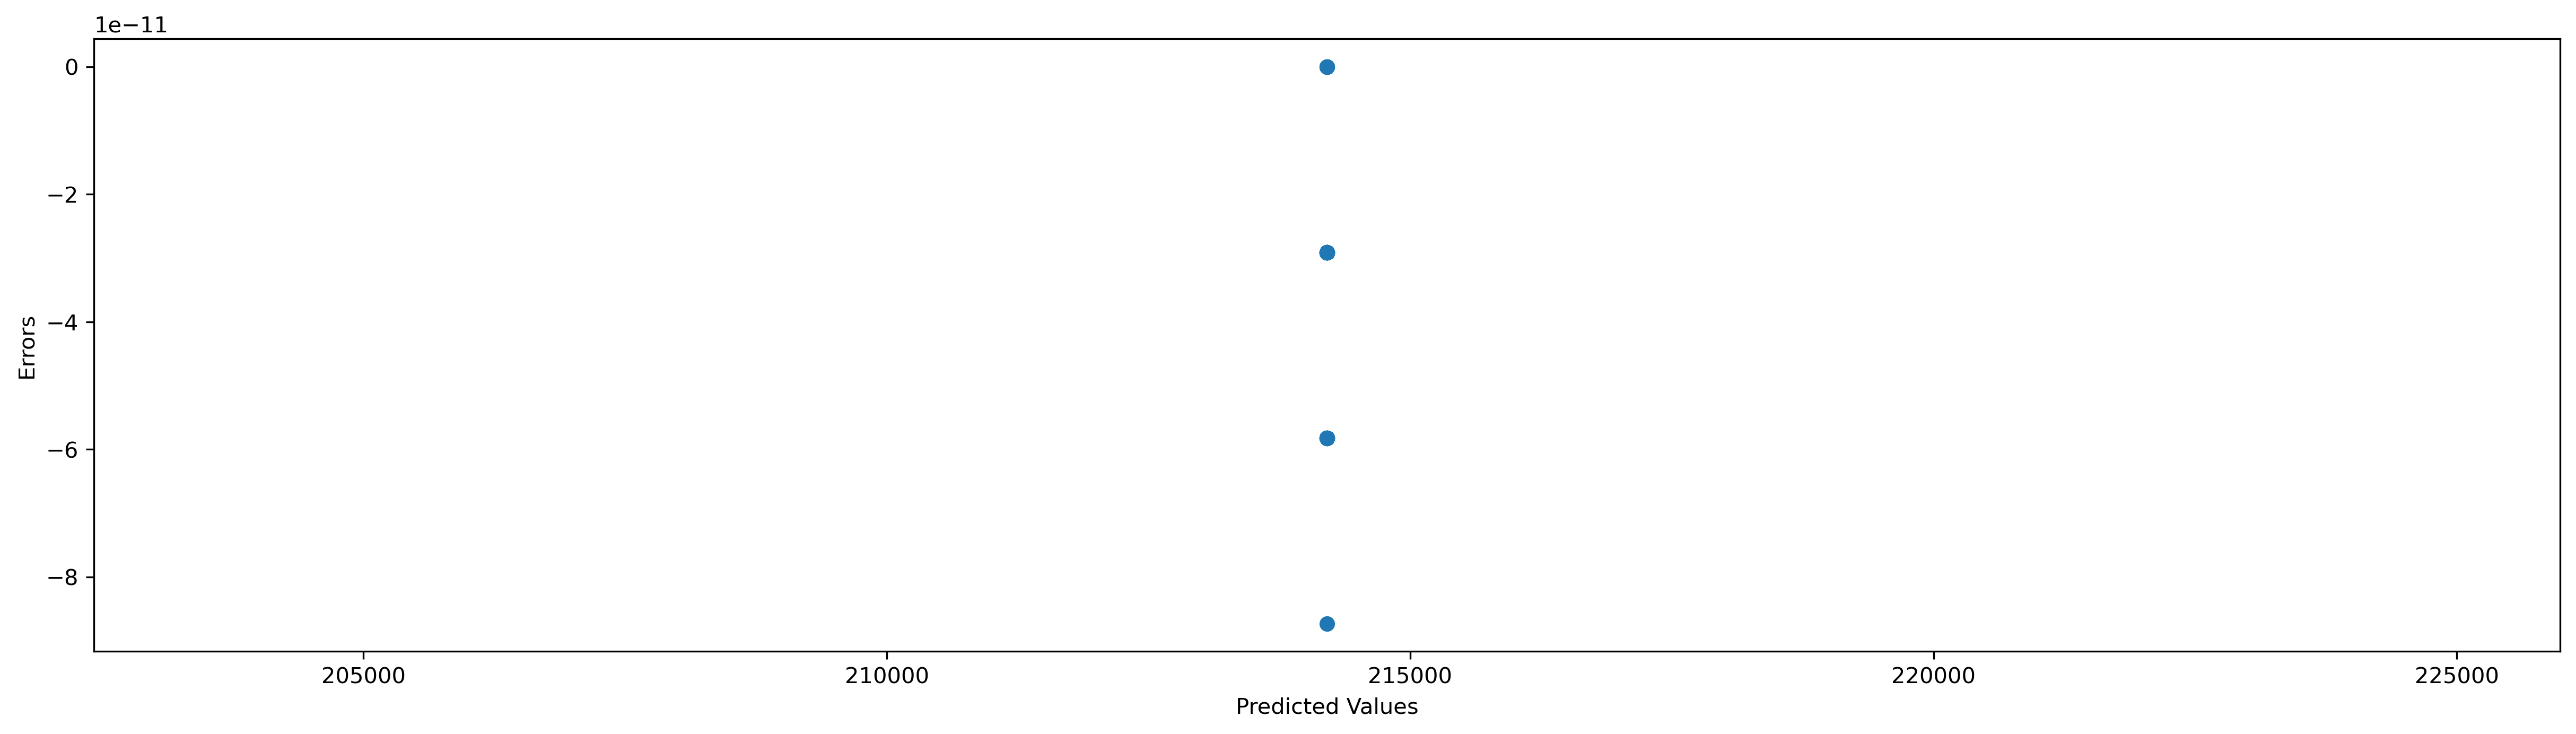

In [33]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

In [38]:
sm.graphics.plot_regress_exog(model,'Marketing Spend');

ValueError: 'Marketing Spend' is not in list

<Figure size 6000x1500 with 0 Axes>

ValueError: 'Marketing Spend' is not in list

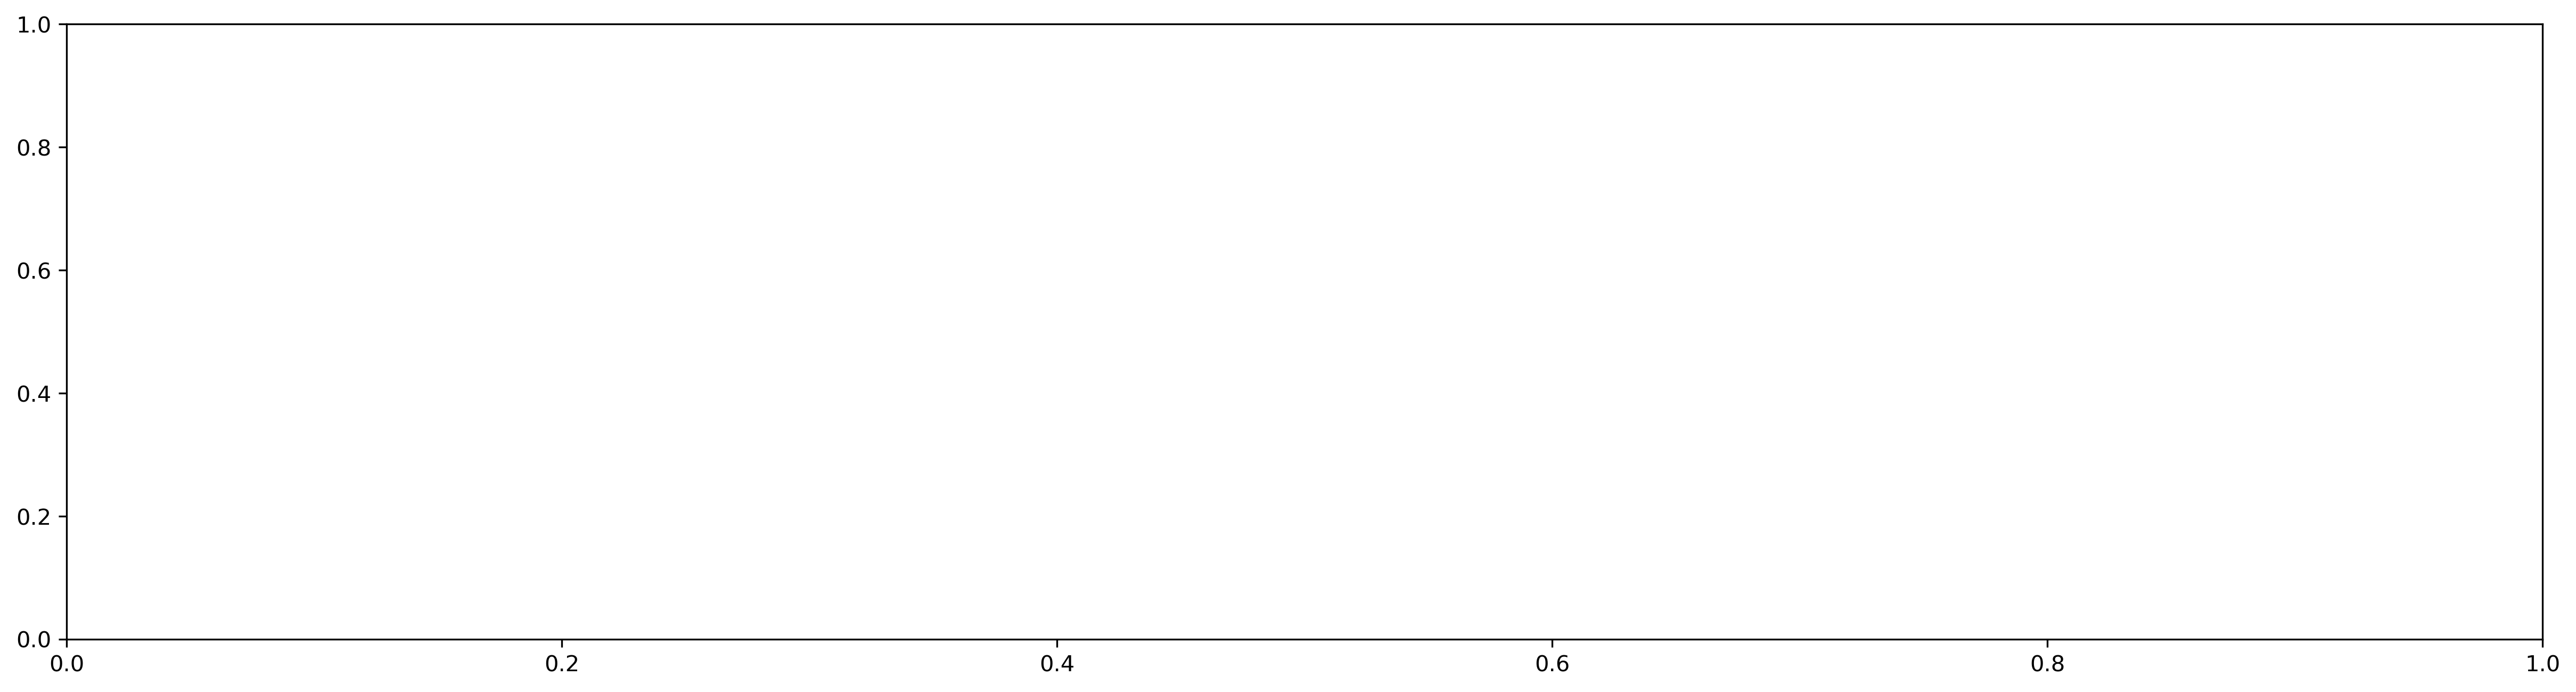

In [39]:
sm.graphics.plot_fit(model,'Marketing Spend');

In [40]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [41]:
c

array([0.15569286, 0.07989473, 0.05411316, 0.04055178, 0.01412083,
       0.0416138 , 0.02382119, 0.00802209, 0.03271963, 0.00917244,
       0.00755885, 0.00947839, 0.00526086, 0.00584434, 0.00920439,
       0.0246256 , 0.00572385, 0.0290918 , 0.005387  , 0.09521362,
       0.0072482 , 0.05039448, 0.00655517, 0.00712884, 0.0336701 ,
       0.00574014, 0.00854444, 0.05647015, 0.07488478, 0.03337265,
       0.01047279, 0.03557202, 0.01004674, 0.00611929, 0.01308782,
       0.03384805, 0.00946816, 0.        , 0.06169363, 0.0083654 ,
       0.00701365, 0.01014352, 0.00729029, 0.03745857, 0.01151293,
       0.01172462, 0.03435323, 0.        , 0.        , 0.        ])

Text(0, 0.5, 'Cooks Distance')

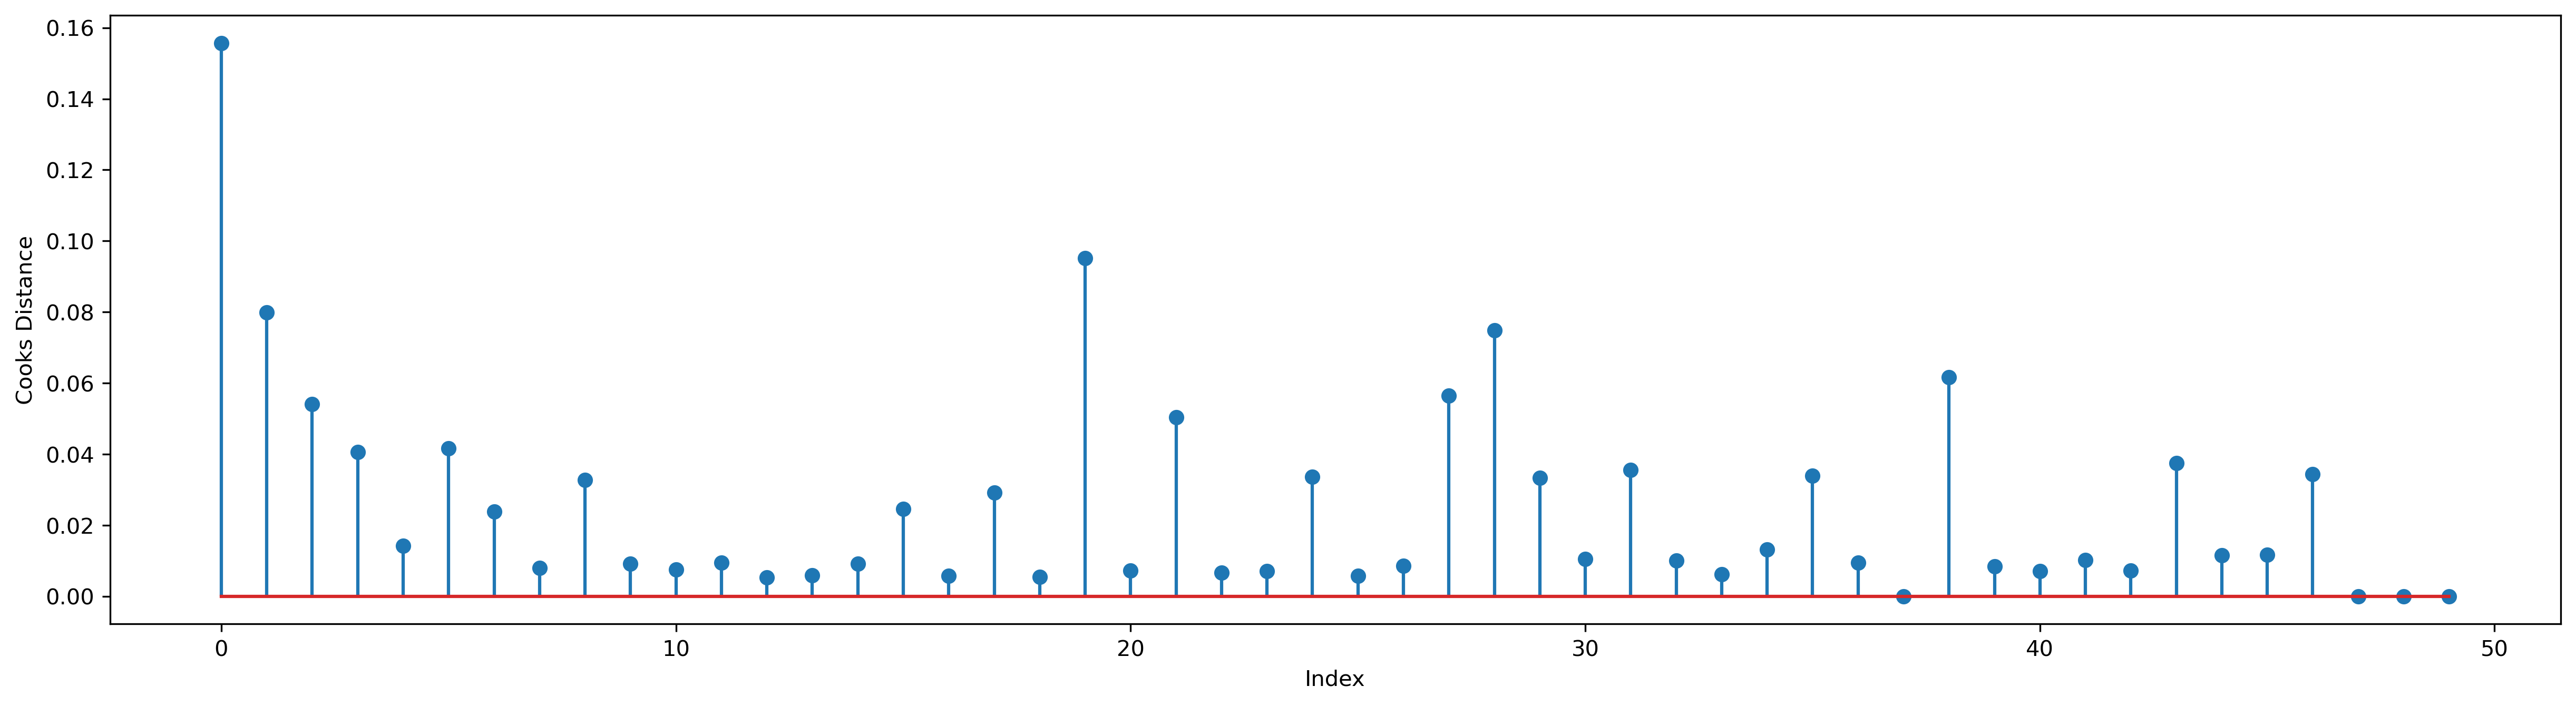

In [42]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [43]:
np.argmax(c), np.max(c)

(0, 0.15569286283380707)

In [44]:
from statsmodels.graphics.regressionplots import influence_plot

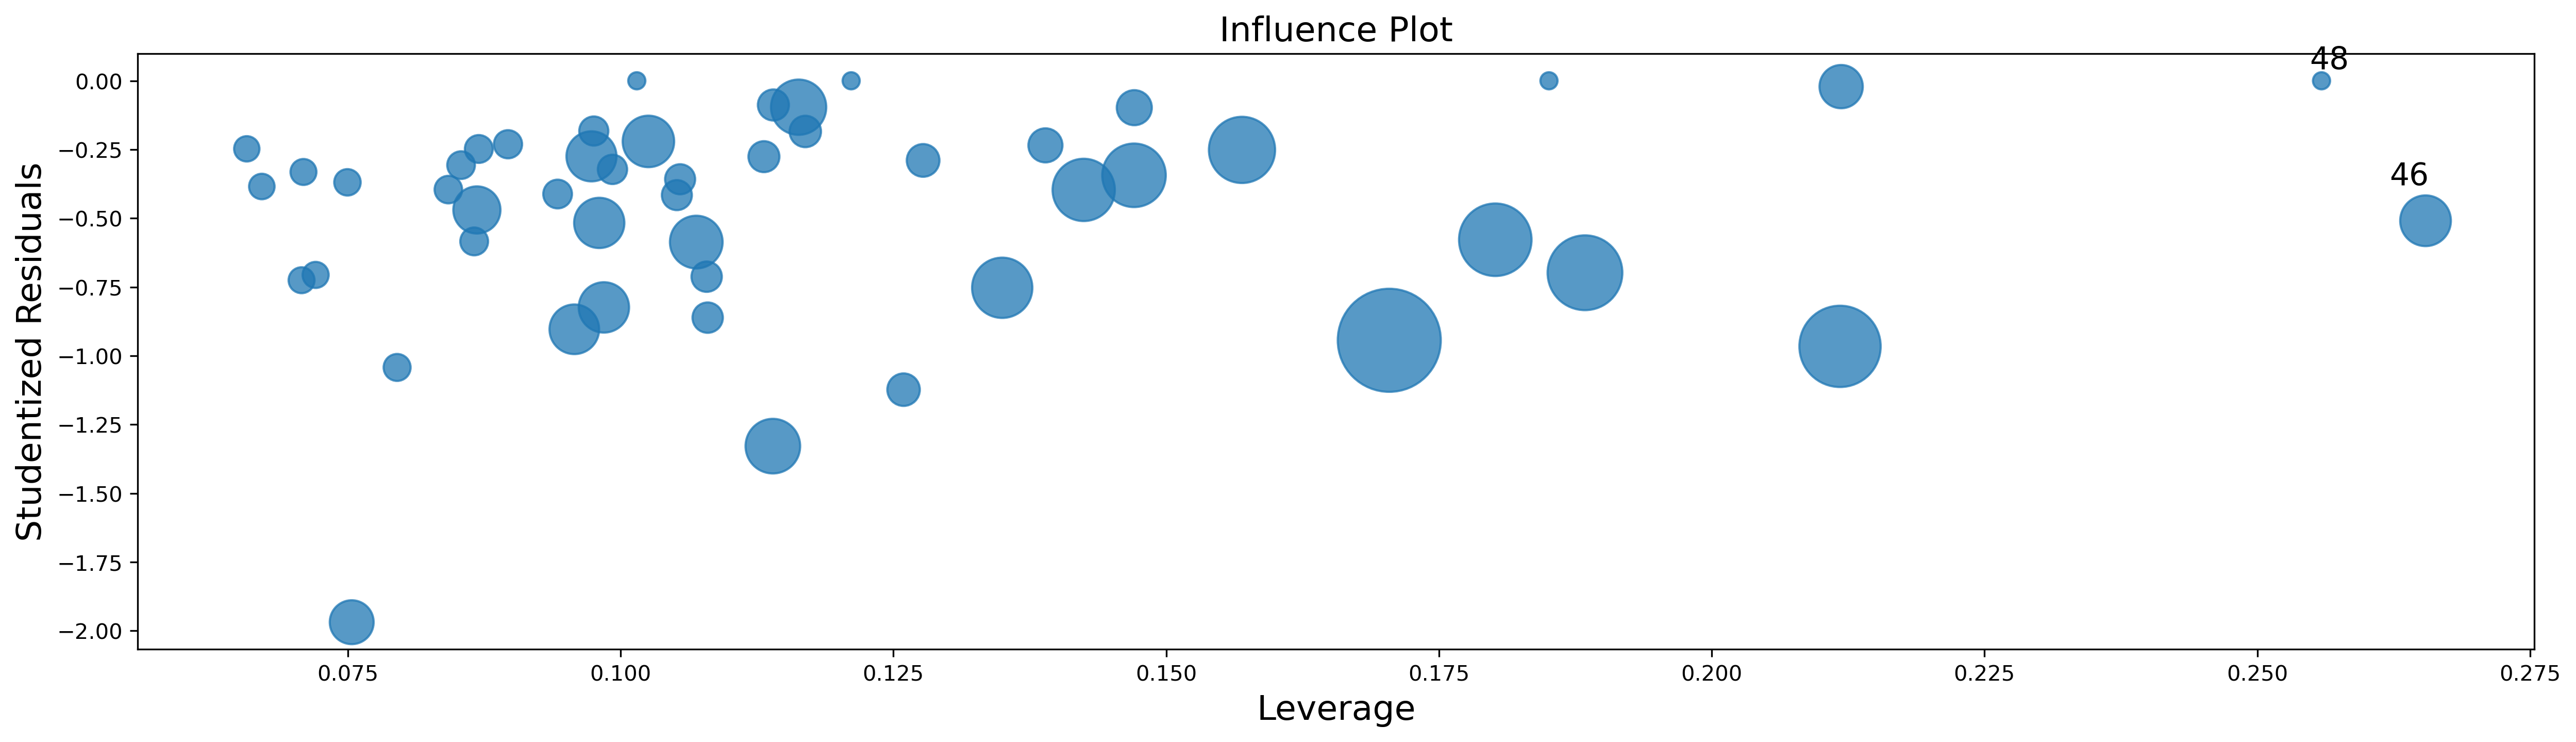

In [45]:
influence_plot(model);

In [46]:
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.36

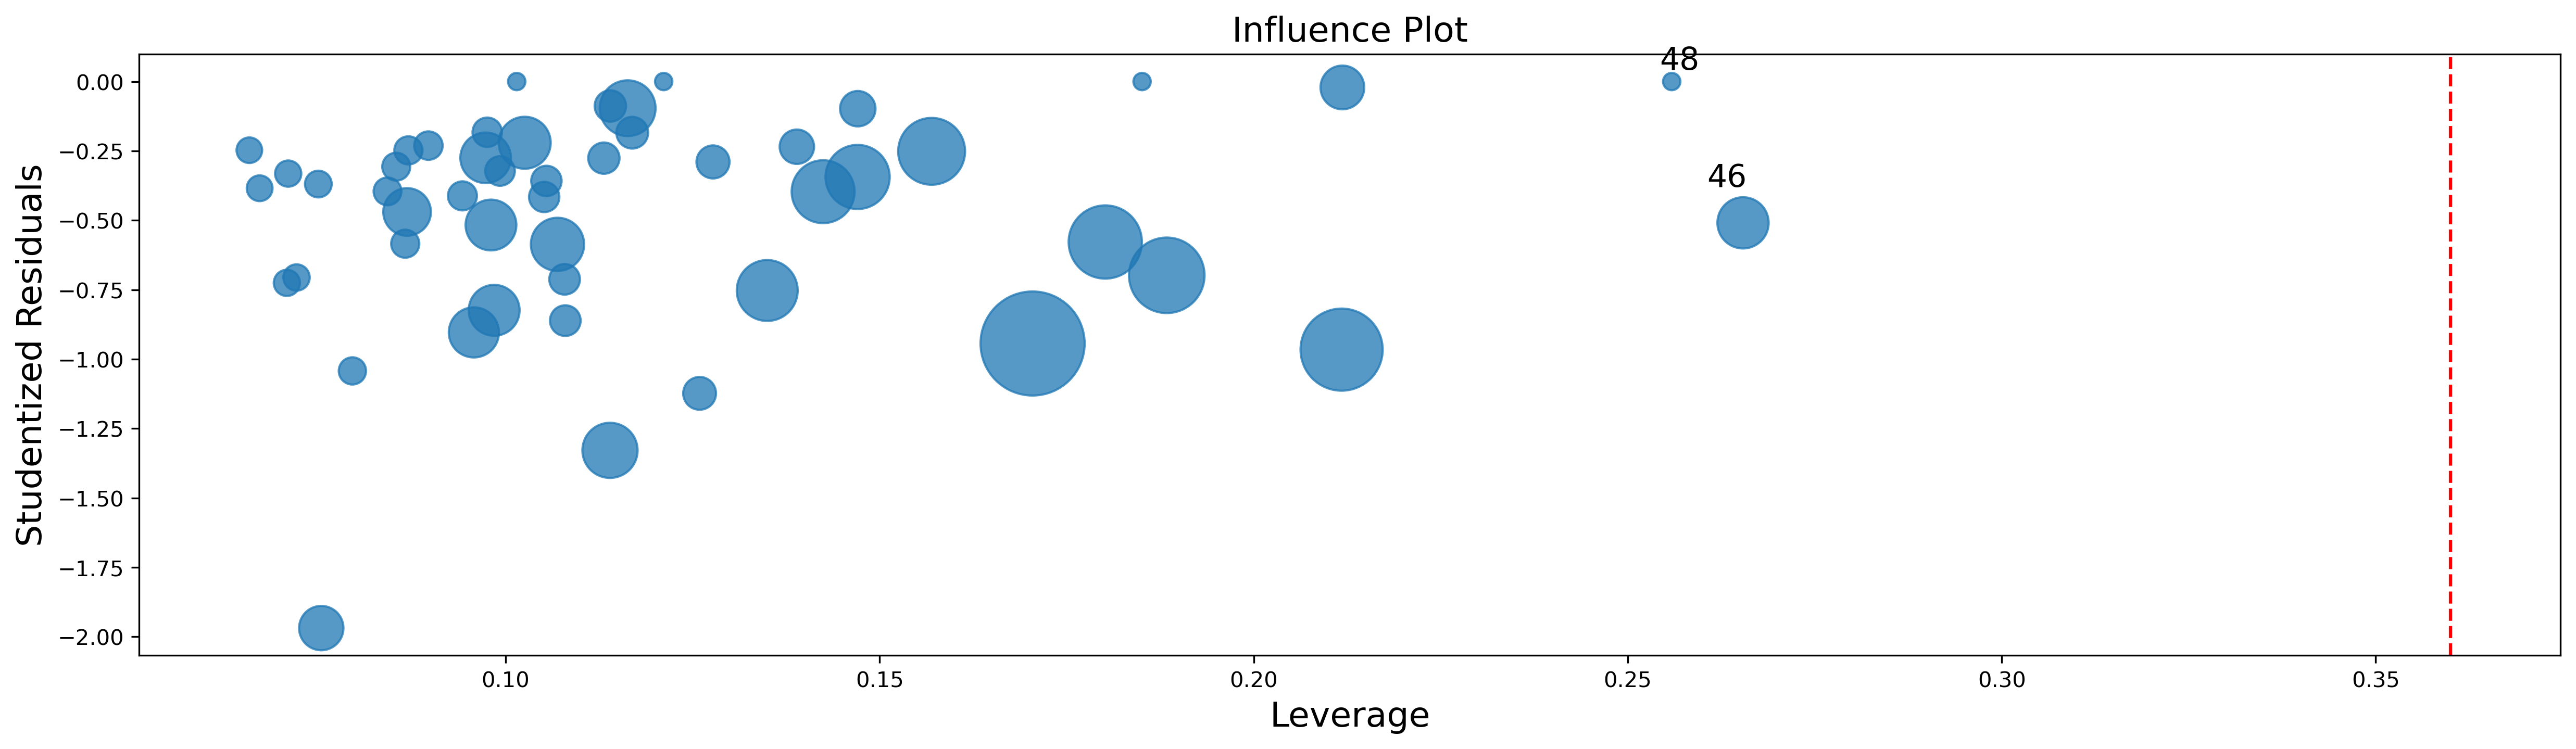

In [47]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')